In [1]:
#DS360withAkanksha | Saturday Special:Data Visualization

In [8]:
#Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
#Getting data

df=pd.read_csv('african_crises.csv')

In [4]:
#looking at top rows

df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
#Getting statistics
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [6]:
#Checking the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [7]:
#Checking unique countries

unique_countries=df.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

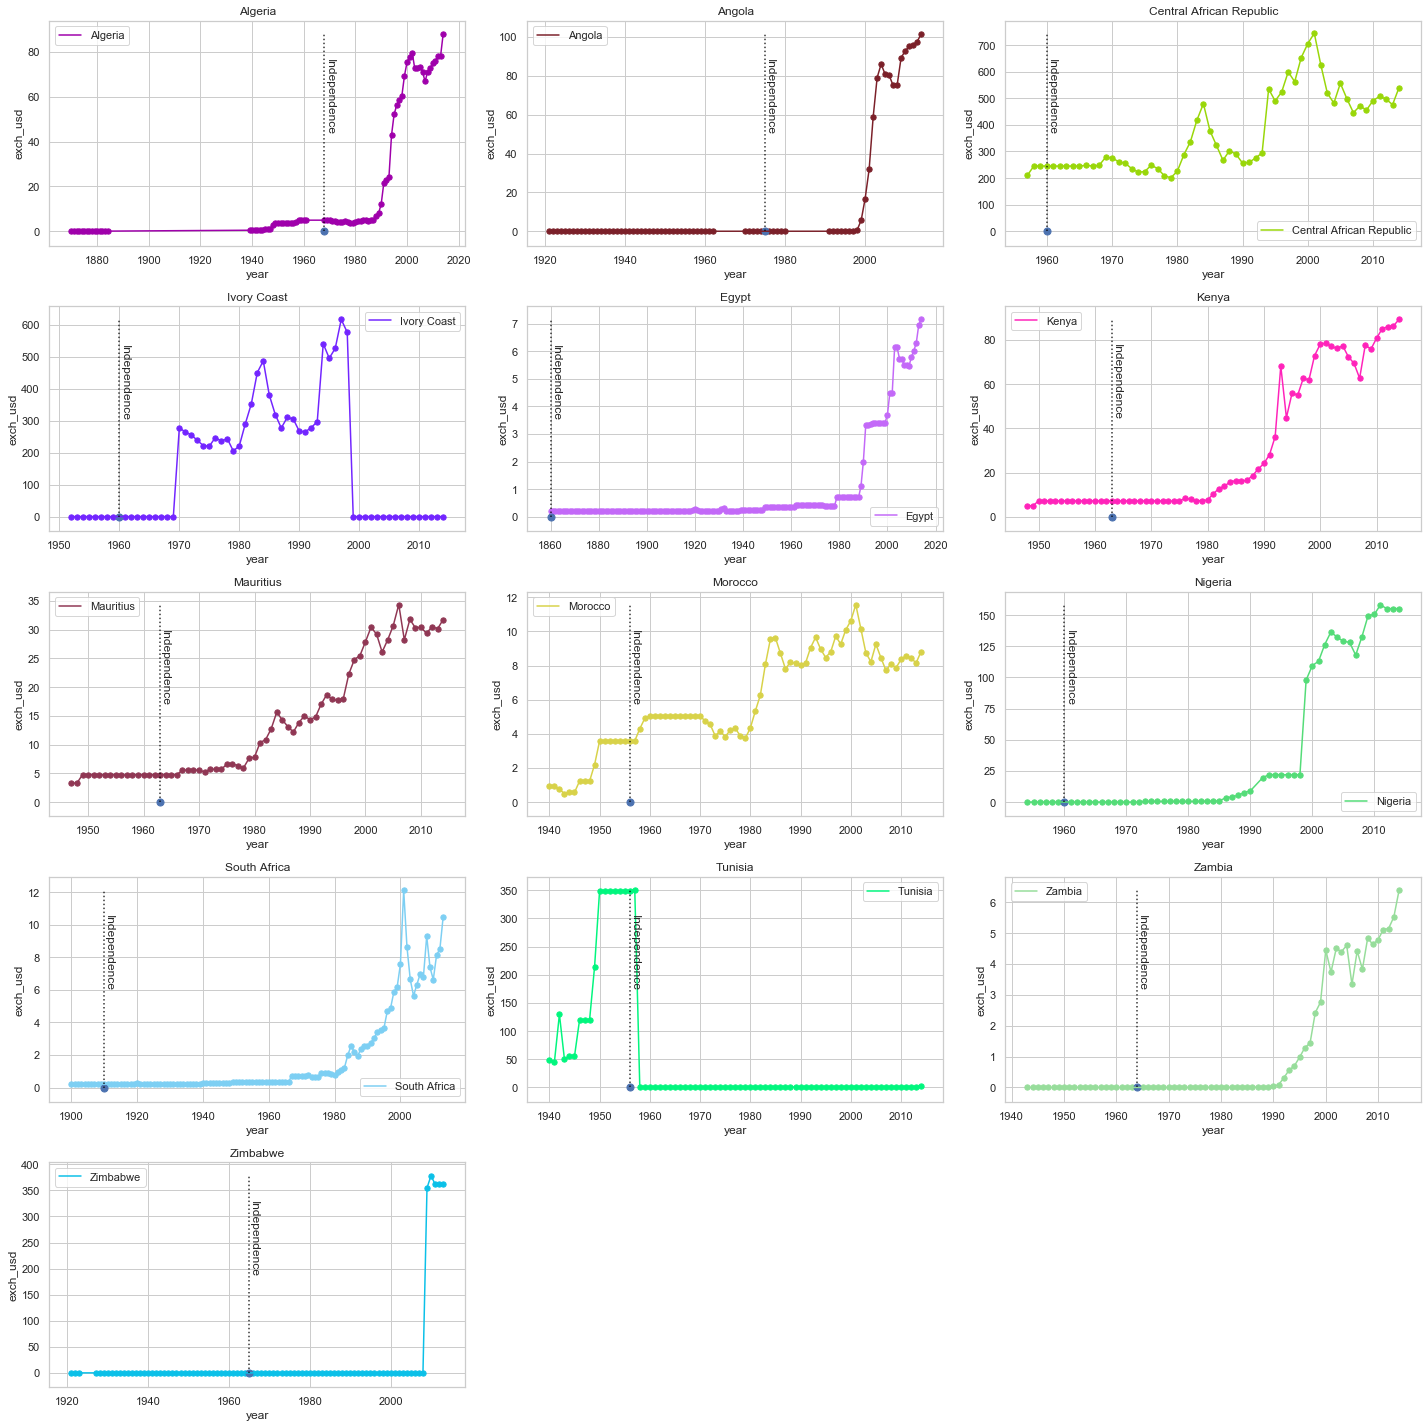

In [10]:
# Visualizing year wise average USD exchange rate of each country

sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(df[df.country==country]['year'],
                df[df.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [0,
              np.max(df[df.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
             np.max(df[df.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

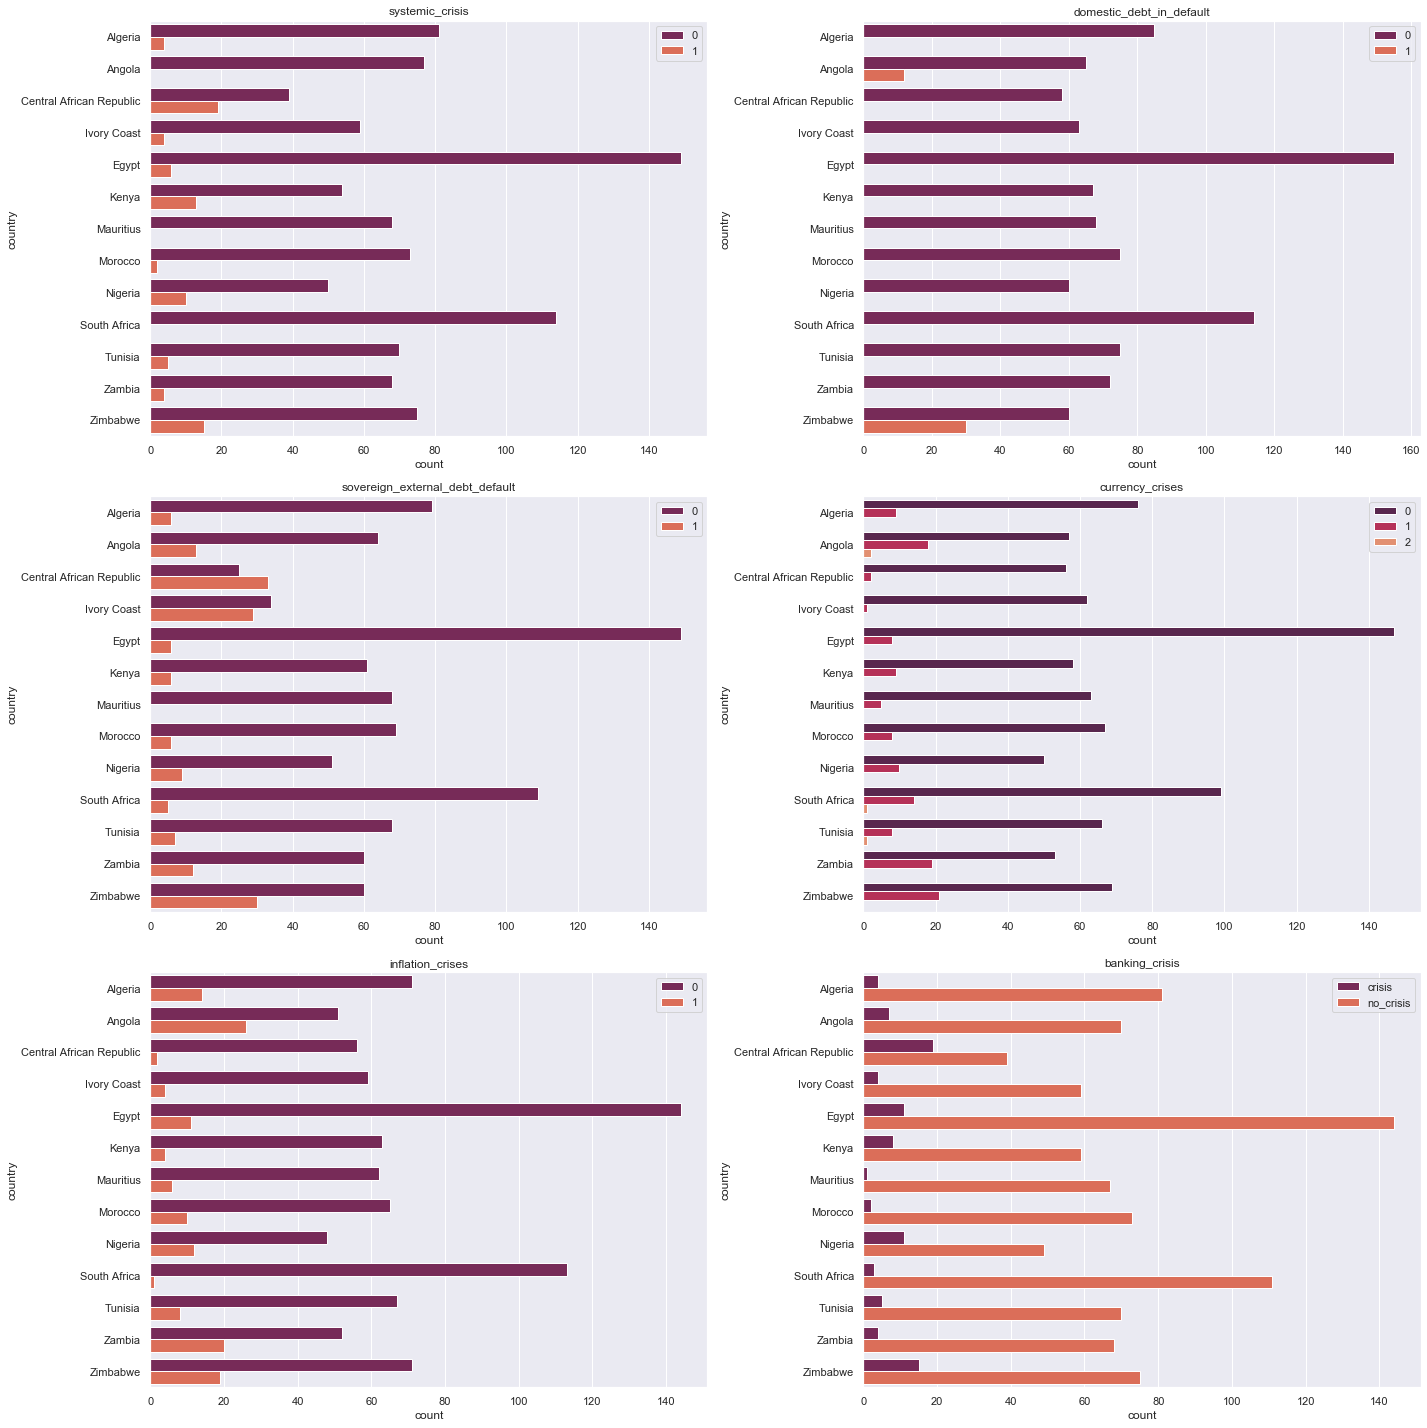

In [11]:
#Visualizing debt count of each country

sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=df.country,hue=df[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

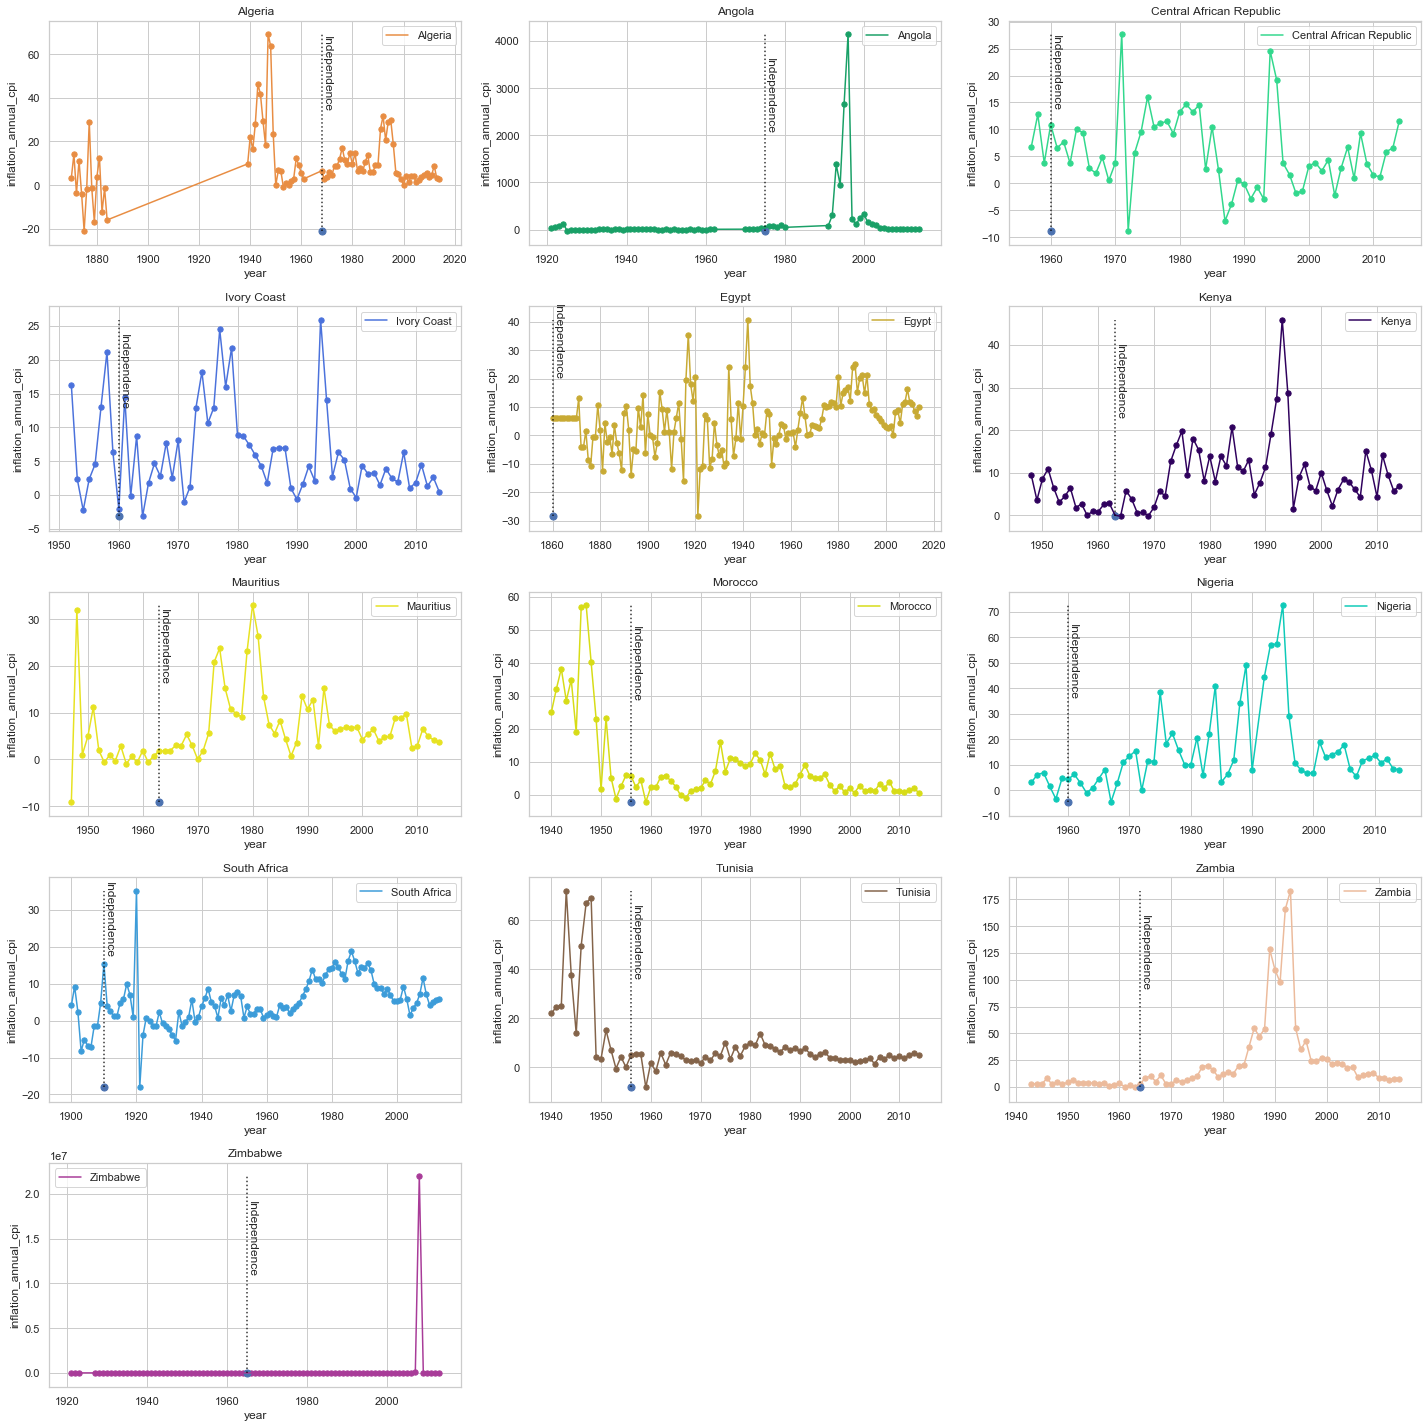

In [13]:
#Visualizing year wise inflation

sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=col)
    plt.scatter(df[df.country==country]['year'],
                df[df.country==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [np.min(df[df.country==country]['inflation_annual_cpi']),
              np.max(df[df.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
             np.max(df[df.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=np.min(df[df.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

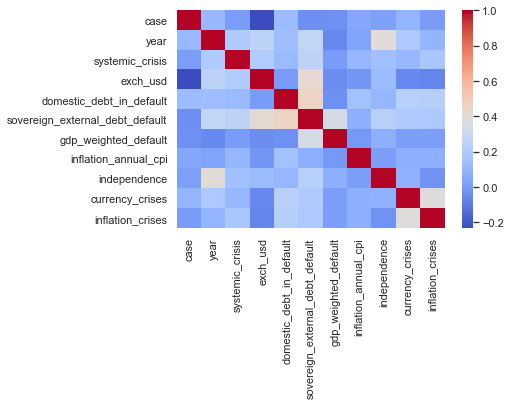

In [16]:
# Visualizing Data Correlation

sns.heatmap(df.corr(), cmap="coolwarm")

Observation: We can notice in the above heatmap that inflation_crises is highly correlated with currency_crises. Additionally
    both features are highly correlated with domestic_debt_in_default and sovereign_external_debt_default.